In [1]:
from datetime import datetime
from config import AgentConfig
from dqn.agent import Agent
import pytz
import warnings
import pandas as pd

timestep: 2348


  0%|                                    | 0/65.85714285714286 [00:00<?, ?it/s]

symbols not found
INFO:tensorflow:Restoring parameters from C:\tmp\dqn\model.ckpt-2348


C:\Users\michael\PycharmProjects\FinancialDeepLearning\DQL-Trader\dqn\agent.py:173: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  long_positions = action[:len(action)/2]
C:\Users\michael\PycharmProjects\FinancialDeepLearning\DQL-Trader\dqn\agent.py:174: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  short_positions = action[len(action)/2:]
66it [00:23, 10.37it/s]                                                        

Entire data start date: 2010-01-04
Entire data end date: 2015-07-01


Out-of-Sample Months: 5
Backtest Months: 59


Performance statistics,All history,Backtest,Out of sample
annual_return,0.01,0.01,0.04
cum_returns_final,0.05,0.03,0.02
annual_volatility,0.04,0.04,0.05
sharpe_ratio,0.28,0.20,0.92
calmar_ratio,0.13,0.09,1.47
stability_of_timeseries,0.05,0.00,0.00
max_drawdown,-0.07,-0.07,-0.03
omega_ratio,1.06,1.04,1.19
sortino_ratio,0.39,0.27,1.51
skew,-0.62,-1.00,1.42


67it [00:40, 10.37it/s]                                                        

Worst drawdown periods,net drawdown in %,peak date,valley date,recovery date,duration
0,7.46,2012-05-31,2013-09-16,2015-01-07,680
1,3.92,2010-09-24,2012-01-04,2012-04-23,412
2,2.84,2015-01-29,2015-05-05,NaT,NaN
3,1.84,2012-04-24,2012-05-17,2012-05-30,27
4,1.22,2015-01-08,2015-01-16,2015-01-22,11




[-0.005 -0.011]


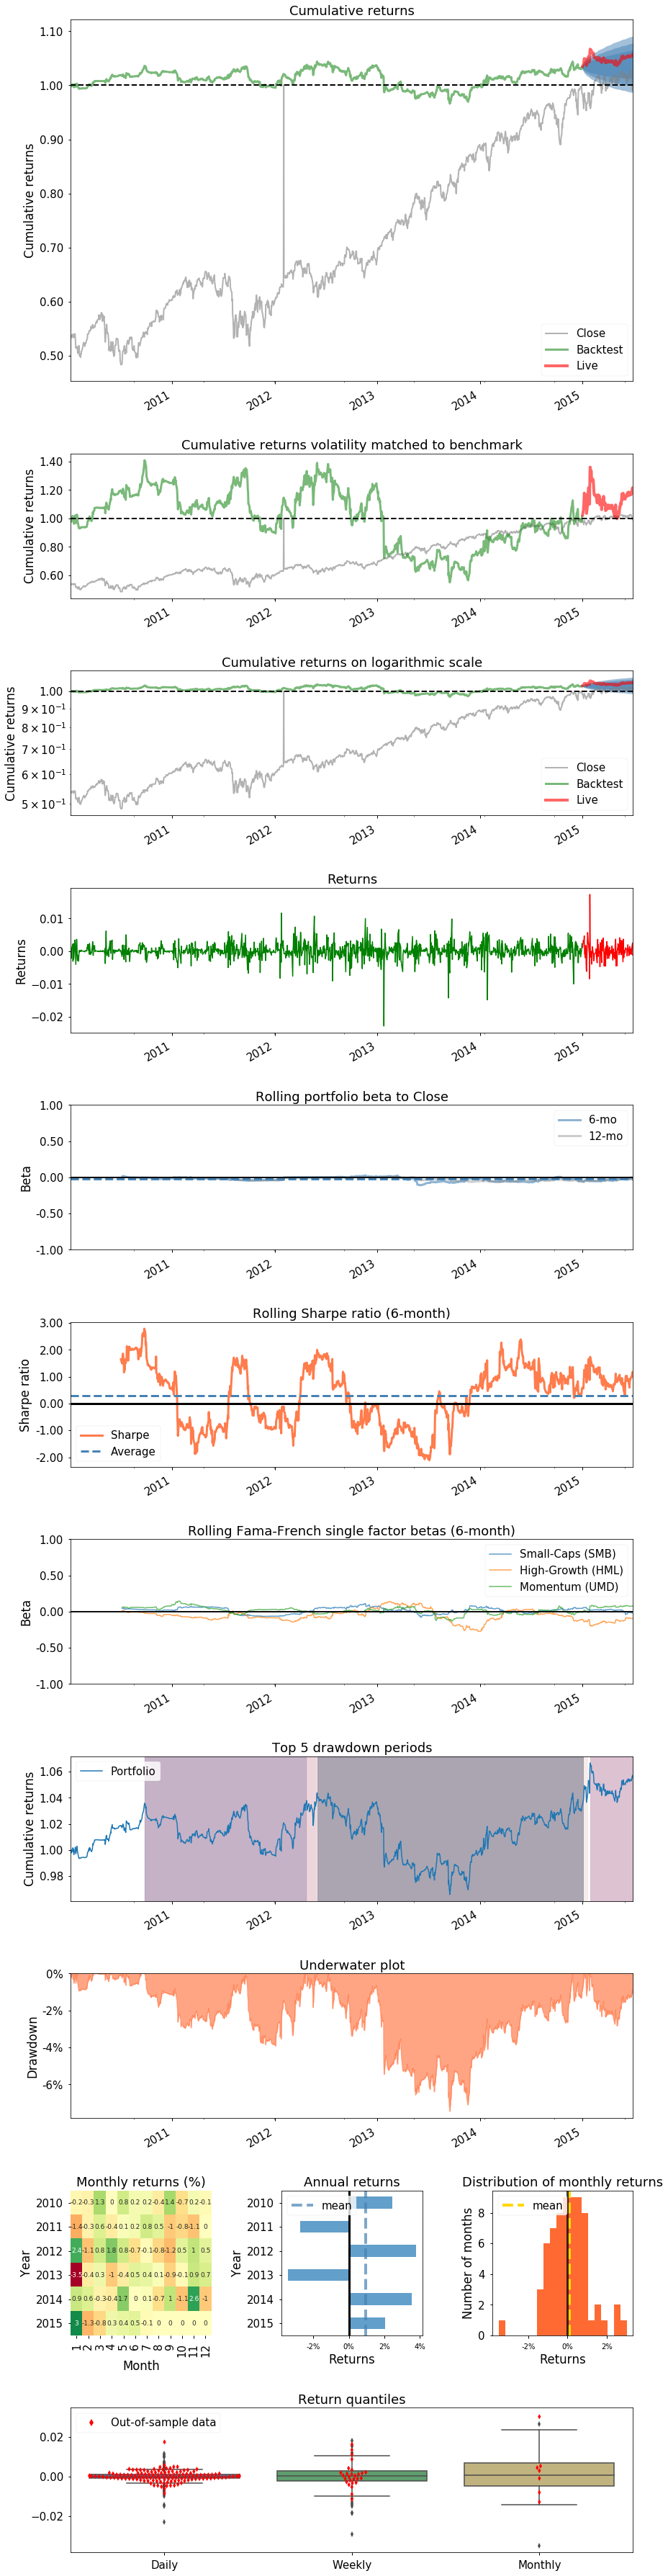

C:\Users\michael\Anaconda3\envs\portfolio-optimization\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


Stress Events,mean,min,max
US downgrade/European Debt Crisis,0.00%,-0.30%,0.34%
Fukushima,0.00%,-0.29%,0.30%
EZB IR Event,-0.06%,-0.74%,0.32%
Flash Crash,0.06%,-0.38%,0.62%
Apr14,-0.02%,-0.64%,0.23%
Oct14,-0.05%,-0.37%,0.13%
Recovery,0.00%,-0.91%,1.17%
New Normal,0.00%,-2.29%,1.74%


KeyError: 'US downgrade/European Debt Crisis'

In [2]:
warnings.simplefilter("ignore", DeprecationWarning)

config = AgentConfig()
print('timestep: {}'.format(config.resume_from_checkpoint))

# parameters
sd = datetime(2010, 1, 1, 0, 0, 0, 0, pytz.utc)
ed = datetime(2015, 7, 1, 0, 0, 0, 0, pytz.utc)
live_start_date = datetime(2015, 1, 1, 0, 0, 0, 0, pytz.utc)

syms = ['AAPL', 'XOM', 'IBM', 'CAT']
captial = 1000000

agent = Agent(config, syms, captial)
agent.test(sd, ed, live_start_date=live_start_date, benchmark='VTI')